# KNN (K NEAREST NEIGHBORS)

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Cluster creation
mean_01 = np.array([0.0, 0.0])
mean_02 = np.array([0., 9.])
mean_03 = np.array([11., 11.])

cov_01 = np.array([[3., 0.3],
                  [0.3, 2.]])
cov_02 = np.array([[2., 0.3],
                  [0.3, 2.]])
cov_03 = np.array([[4., 0.2],
                  [0.2, 3.]])

data_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
data_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
data_03 = np.random.multivariate_normal(mean_03, cov_03, 500)

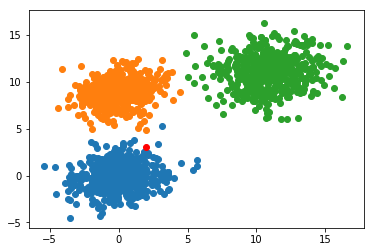

In [30]:
# plotting clusters
plt.figure(0)
plt.scatter(data_01[:, 0], data_01[:, 1])
plt.scatter(data_02[:, 0], data_02[:, 1])
plt.scatter(data_03[:, 0], data_03[:, 1])
plt.scatter(2, 3, c='r')
plt.show()

In [12]:
label = np.zeros((1500,1))
label[500:1000] = 1
label[1000:] = 2
data1 = np.concatenate((data_01, data_02, data_03), axis=0)
data = np.concatenate((data1, label), axis=1)
print data.shape

(1500, 3)


In [31]:
def KNN(train, test, k=10):
    def eucledian_distance(x1, x2):
        return np.sqrt(((x1 - x2)**2).sum())
    
    # Calculating distances for each training data
    dist = []
    label = {0.0:'blue',
            1.0:'yellow',
            2.0:'green'}

    for ix in range(train.shape[0]):
        d = eucledian_distance(train[ix,:-1], test)
        lab = train[ix, -1]
        dist.append([d, lab])
    
    # Sorting the list of distances
    d_sort = sorted(dist, key=lambda x:x[0])[:k][1]
    
    # Identifying the unique elements and frequency
    d_unique = np.unique(d_sort, return_counts=True)
    
    # Getting the index with maximum number of arguments
    index = np.argmax(d_unique[1])
    
    return label[d_unique[0][index]]

In [32]:
test_data = [2., 3.]

cls = KNN(data, test_data, k=10)
print cls

blue
